In [30]:
import numpy as np

class Game:
    def __init__(self, size=5, deterministic=True):
        """
        Initialize the game

        The game is a 5x5 grid world with the following rewards:
        -1 at 5 random locations
        1 at the top left corner
        1 at the top right corner
        1 at the bottom left corner
        1 at the bottom right corner

        The agent can move up, right, down, or left. If the agent tries to move off the grid, it will stay in the same location.

        The game is over when the agent reaches one of the corners.

        The state space is 25 states, and the action space is 4 actions.

        The game is deterministic.

        The game is implemented as a Markov Decision Process (MDP) with the following attributes:
        - states: a list of all possible states
        - actions: a list of all possible actions
        - rewards: a list of rewards for each state
        - state: the current state of the agent

        The game has the following methods:
        - set_rewards: randomly set the rewards for the game
        - step: take a step in the game
        - reset: reset the game to the starting state
        """
        self.size = size
        self.states = np.arange(self.size**2)
        self.actions = np.arange(4)
        self.rewards = np.zeros(self.size**2)
        self.set_rewards()
        self.state = (self.size**2)//2
        self.deterministic = deterministic


    def set_rewards(self):
        """
        Randomly set the rewards for the game
        """
        for i in range(self.size):
            self.rewards[np.random.randint(0, self.size**2)] = -1
        self.rewards[0] = 1
        self.rewards[self.size-1] = 2
        self.rewards[self.size**2-self.size] = 3
        self.rewards[self.size**2-1] = 4

    def step(self, action):
        """
        Take a step in the game

        Args:
        - action: the action to take (0: up, 1: right, 2: down, 3: left)

        Returns:
        - the new state
        - the reward for the new state
        - whether the game is over
        """
        if self.state == 0 or self.state == self.size-1 or self.state == self.size**2-self.size or self.state == self.size**2-1:
            return self.state, 0, True
        if action == 0 and self.state >= self.size:
            self.state = self.state - self.size
        elif action == 1 and self.state % self.size != self.size-1:
            self.state = self.state + 1
        elif action == 2 and self.state < self.size**2-self.size:
            self.state = self.state + self.size
        elif action == 3 and self.state % self.size != 0:
            self.state = self.state - 1
        return self.state, self.rewards[self.state], False

    def reset(self):
        """
        Reset the game to the starting state
        """
        self.state = 12
        if not self.deterministic:
            self.set_rewards() #if you want to change the rewards every time you reset the game, making it harder and not deterministic
        return self.state



Training q-agent

Episode 0 ended with total reward: 1.0
Episode 100 ended with total reward: 1.0
Episode 200 ended with total reward: 1.0
Episode 300 ended with total reward: 1.0
Episode 400 ended with total reward: 1.0
Episode 500 ended with total reward: 1.0
Episode 600 ended with total reward: 1.0
Episode 700 ended with total reward: 1.0
Episode 800 ended with total reward: 1.0
Episode 900 ended with total reward: 1.0
Episode 1000 ended with total reward: 1.0
Episode 1100 ended with total reward: 1.0
Episode 1200 ended with total reward: 1.0
Episode 1300 ended with total reward: 1.0
Episode 1400 ended with total reward: 1.0
Episode 1500 ended with total reward: 1.0
Episode 1600 ended with total reward: 1.0
Episode 1700 ended with total reward: 1.0
Episode 1800 ended with total reward: 1.0
Episode 1900 ended with total reward: 1.0
Episode 2000 ended with total reward: 1.0
Episode 2100 ended with total reward: 1.0
Episode 2200 ended with total reward: 1.0
Episode 2300 ended with total reward: 1.0
Epis

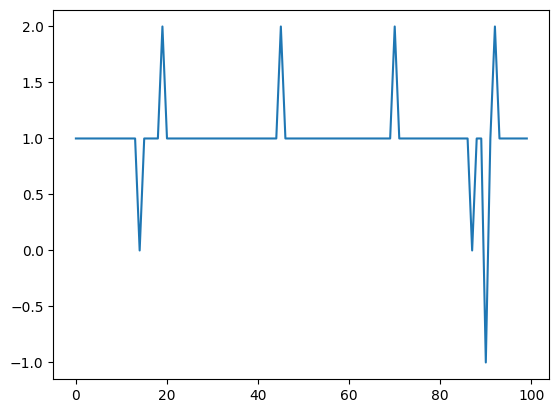

In [87]:
class QLearningAgent:
    def __init__(self, alpha=0.1, gamma=0.99, epsilon=0.6):
        """
        Initialize the Q-learning agent

        The agent has the following attributes:
        - alpha: the learning rate
        - gamma: the discount factor
        - epsilon: the exploration rate
        - num_states: the number of states
        - num_actions: the number of actions
        - Q: the Q-table

        The agent has the following methods:
        - choose_action: choose an action
        - update: update the Q-table
        - train: train the agent
        - test: test the agent

        Args:
        - alpha: the learning rate
        - gamma: the discount factor
        - epsilon: the exploration rate

        Returns:
        - None
        """
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.num_states = env.size**2
        self.num_actions = 4
        self.Q = np.zeros((self.num_states, self.num_actions))
    
    def choose_action(self, state):
        """
        Choose an action

        Args:
        - state: the current state

        Returns:
        - the chosen action
        """
        if np.random.uniform(0, 1) < self.epsilon:
            return random.choice(env.actions)
        else:
            return np.argmax(self.Q[state, :])
    
    def update(self, state, action, reward, next_state):
        """
        Update the Q-table

        Args:
        - state: the current state
        - action: the chosen action
        - reward: the reward for the action
        - next_state: the next state

        Returns:
        - None
        """
        old_value = self.Q[state, action]
        next_max = np.max(self.Q[next_state, :])
        self.Q[state, action] = old_value + self.alpha * (reward + self.gamma * next_max - old_value)
    
    def train(self, env, num_episodes):
        """
        Train the agent

        Args:
        - env: the environment
        - num_episodes: the number of episodes

        Returns:
        - None
        """
        rewards_seen = []
        for episode in range(num_episodes):
            state = env.reset()
            done = False
            total_reward = 0
            while not done:
                state = int(state)
                action = self.choose_action(state)
                next_state, reward, done = env.step(action)
                next_state = int(next_state)
                total_reward += reward
                self.update(state, action, reward, next_state)
                state = next_state
            rewards_seen.append(total_reward)
            if episode % 100 == 0:
                print(f"Episode {episode} ended with total reward: {total_reward}")
        plt.plot(rewards_seen[:100])
    
    def test(self, env):
        """
        Test the agent

        Args:
        - env: the environment

        Returns:
        - None
        """
        accuracy = 0
        state = env.reset()
        done = False
        total_reward = 0
        while not done:
            state = int(state)
            action = np.argmax(self.Q[state, :])
            next_state, reward, done = env.step(action)
            next_state = int(next_state)
            total_reward += reward
            state = next_state
        if total_reward >= 0:
            accuracy += total_reward/4
        print(f"Accuracy: {accuracy}")

env = Game(10)
num_episodes = 1000
agent = QLearningAgent()
agent.train(env, 10000)
agent.test(env)


Training k-agent

Episode: 1000 Total Reward: 0.0
Episode: 2000 Total Reward: 0.0
Episode: 3000 Total Reward: 1.0
Episode: 4000 Total Reward: 1.0
Episode: 5000 Total Reward: 1.0
Episode: 6000 Total Reward: 1.0
Episode: 7000 Total Reward: 1.0
Episode: 8000 Total Reward: 1.0
Episode: 9000 Total Reward: 1.0
Episode: 10000 Total Reward: 1.0


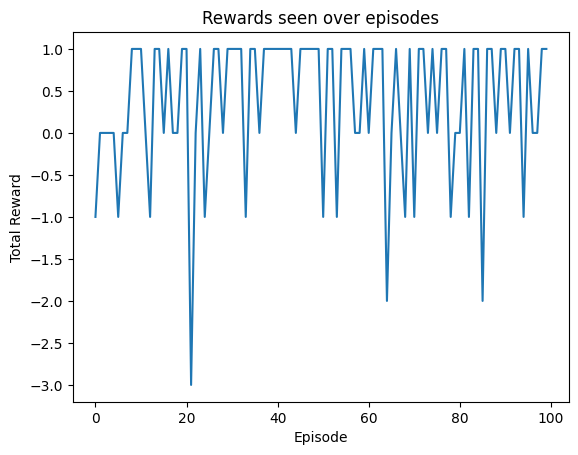

Accuracy: 0.25


In [135]:

class KLearningAgent:
    def __init__(self, num_states, num_actions, alpha=0.1, gamma=0.99, epsilon=0.6, k=10):
        """
        Initialize the K-learning agent

        Args:
        - num_states (int): the number of states
        - num_actions (int): the number of actions
        - alpha (float): the learning rate
        - gamma (float): the discount factor
        - epsilon (float): the exploration rate
        - k (int): the number of planning steps

        Returns:
        None
        """
        self.num_states = num_states
        self.num_actions = num_actions
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.k = k
        self.Q = np.zeros((num_states, num_actions))

    def select_action(self, state):
        """
        Select an action based on the current state

        Args:
        - state: the current state

        Returns:
        - action: the selected action
        """
        if np.random.uniform(0, 1) < self.epsilon:
            return random.choice(range(self.num_actions))  # Explore
        else:
            return np.argmax(self.Q[state])  # Exploit

    def update(self, state, action, reward, next_state, done, steps_remaining):
        """
        Update the Q-values based on the observed state, action, reward, next state, and done flag

        Args:
        - state: the current state
        - action: the selected action
        - reward: the observed reward
        - next_state: the next state
        - done: a flag indicating if the episode is done
        - steps_remaining: the number of remaining planning steps

        Returns:
        None
        """
        if not done:
            next_max = np.max(self.Q[next_state])
            target = reward + self.gamma * next_max
        else:
            target = reward

        self.Q[state, action] += self.alpha * (target - self.Q[state, action])

    def train(self, env, num_episodes):
        """
        Train the agent using the given environment for a specified number of episodes

        Args:
        - env: the environment to train the agent on
        - num_episodes: the number of episodes to train for

        Returns:
        None
        """
        rewards_seen = []
        for episode in range(num_episodes):
            state = env.reset()  # Reset environment and get initial state
            total_reward = 0
            done = False
            steps_remaining = self.k

            while not done and steps_remaining > 0:
                action = self.select_action(state)
                next_state, reward, done = env.step(action)
                total_reward += reward
                next_state = int(next_state)  # Ensure next state is an integer
                self.update(state, action, reward, next_state, done, steps_remaining)
                state = next_state
                steps_remaining -= 1

            rewards_seen.append(total_reward)
            if (episode + 1) % 1000 == 0:
                print("Episode:", episode + 1, "Total Reward:", total_reward)

        plt.plot(rewards_seen[0:100])
        plt.xlabel('Episode')
        plt.ylabel('Total Reward')
        plt.title('Rewards seen over episodes')
        plt.show()
    
    def test(self, env):
        """
        Test the agent's performance on the given environment

        Args:
        - env: the environment to test the agent on

        Returns:
        None
        """
        accuracy = 0
        state = env.reset()
        done = False
        total_reward = 0

        while not done:
            action = self.select_action(state)
            next_state, reward, done = env.step(action)
            total_reward += reward
            next_state = int(next_state)  # Ensure next state is an integer
            state = next_state
        
        if total_reward >= 0:
            accuracy += total_reward/4
        
        print(f"Accuracy: {accuracy}")


# Initialize the environment
env = Game(10)

# Set parameters
num_episodes = 10000

# Initialize Z-learning agent
k_agent = KLearningAgent(num_states=len(env.states), num_actions=len(env.actions), alpha=0.1 , gamma=0.99, epsilon=0.6, k=10)

# Train the agent
k_agent.train(env, num_episodes)

# Test the agent
k_agent.test(env)
